<a href="https://colab.research.google.com/github/TJTomas/DSPS_TTomaszewski/blob/main/HW7/Homework_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [211]:
from google.colab import output
output.enable_custom_widget_manager()

import ipywidgets as ipw
import numpy as np
import pylab as pl
import sklearn.cluster
from sklearn import mixture
from scipy.cluster.vq import kmeans2
%pylab inline


import json
import os
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


# Task 1:
Task 1: make a kaggle account and set up your API (see below)

In [212]:
# this mounts your google drive
from google.colab import drive
drive.mount("/content/gdrive")



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [213]:
# this gets you to your drive folder
%cd gdrive/My\ Drive/

[Errno 2] No such file or directory: 'gdrive/My Drive/'
/content/gdrive/My Drive


In [214]:
# this makes sure the file is there: this cell should return "kaggle.json"
!ls kaggle.json

kaggle.json


In [215]:
# this limits who can view and make changes who can access this file.
!chmod 600 kaggle.json

# this reads in the file and stores it into the system variables of your colab sessions which allows you to connect programmatically to the kaggle platform
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = "e60b57c215e877e01a22375a3058eec1"#envs['key']

#Task 2
Task 2: read in the data for the World Happniess Dataset https://www.kaggle.com/datasets/unsdsn/world-happiness/data - use the 2024 data

In [216]:
import kaggle

In [217]:
# use the kaggle.api.dataset_download_files function to download a specific file from a Kaggle dataset in Jupyter Notebook:
#kaggle.api.dataset_download_files("unsdsn/world-happiness", path="./", unzip=True, quiet=False)
kaggle.api.dataset_download_files("mathurinache/world-happiness-report", path="./", unzip=True, quiet=False)

Dataset URL: https://www.kaggle.com/datasets/mathurinache/world-happiness-report
world-happiness-report.zip: Skipping, found more recently modified local copy (use --force to force download)


In [218]:
happiness = pd.read_csv("2021.csv")

# displaying the 6 raws of contents of the cvs file
happiness.head()

Country name Regional indicator  Ladder score  \
0      Finland     Western Europe         7.842   
1      Denmark     Western Europe         7.620   
2  Switzerland     Western Europe         7.571   
3      Iceland     Western Europe         7.554   
4  Netherlands     Western Europe         7.464   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                           0.032         7.904         7.780   
1                           0.035         7.687         7.552   
2                           0.036         7.643         7.500   
3                           0.059         7.670         7.438   
4                           0.027         7.518         7.410   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0                 10.775           0.954                     72.0   
1                 10.933           0.954                     72.7   
2                 11.117           0.942                     74.4   
3                 10.878           0.983                     73.0   
4                 10.932           0.942                     72.4   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                         0.949      -0.098                      0.186   
1                         0.946       0.030                      0.179   
2                         0.919       0.025                      0.292   
3                         0.955       0.160                      0.673   
4                         0.913       0.175                      0.338   

   Ladder score in Dystopia  Explained by: Log GDP per capita  \
0                      2.43                             1.446   
1                      2.43                             1.502   
2                      2.43                             1.566   
3                      2.43                             1.482   
4                      2.43                             1.501   

   Explained by: Social support  Explained by: Healthy life expectancy  \
0                         1.106                                  0.741   
1                         1.108                                  0.763   
2                         1.079                                  0.816   
3                         1.172                                  0.772   
4                         1.079                                  0.753   

   Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                       0.691                     0.124   
1                                       0.686                     0.208   
2                                       0.653                     0.204   
3                                       0.698                     0.293   
4                                       0.647                     0.302   

   Explained by: Perceptions of corruption  Dystopia + residual  
0                                    0.481                3.253  
1                                    0.485                2.868  
2                                    0.413                2.839  
3                                    0.170                2.967  
4                                    0.384                2.798

In [219]:
happiness.shape

(149, 20)

In [220]:
happiness.describe()

Ladder score  Standard error of ladder score  upperwhisker  \
count    149.000000                      149.000000    149.000000   
mean       5.532839                        0.058752      5.648007   
std        1.073924                        0.022001      1.054330   
min        2.523000                        0.026000      2.596000   
25%        4.852000                        0.043000      4.991000   
50%        5.534000                        0.054000      5.625000   
75%        6.255000                        0.070000      6.344000   
max        7.842000                        0.173000      7.904000   

       lowerwhisker  Logged GDP per capita  Social support  \
count    149.000000             149.000000      149.000000   
mean       5.417631               9.432208        0.814745   
std        1.094879               1.158601        0.114889   
min        2.449000               6.635000        0.463000   
25%        4.706000               8.541000        0.750000   
50%        5.413000               9.569000        0.832000   
75%        6.128000              10.421000        0.905000   
max        7.780000              11.647000        0.983000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               149.000000                    149.000000  149.000000   
mean                 64.992799                      0.791597   -0.015134   
std                   6.762043                      0.113332    0.150657   
min                  48.478000                      0.382000   -0.288000   
25%                  59.802000                      0.718000   -0.126000   
50%                  66.603000                      0.804000   -0.036000   
75%                  69.600000                      0.877000    0.079000   
max                  76.953000                      0.970000    0.542000   

       Perceptions of corruption  Ladder score in Dystopia  \
count                 149.000000              1.490000e+02   
mean                    0.727450              2.430000e+00   
std                     0.179226              5.347044e-15   
min                     0.082000              2.430000e+00   
25%                     0.667000              2.430000e+00   
50%                     0.781000              2.430000e+00   
75%                     0.845000              2.430000e+00   
max                     0.939000              2.430000e+00   

       Explained by: Log GDP per capita  Explained by: Social support  \
count                        149.000000                    149.000000   
mean                           0.977161                      0.793315   
std                            0.404740                      0.258871   
min                            0.000000                      0.000000   
25%                            0.666000                      0.647000   
50%                            1.025000                      0.832000   
75%                            1.323000                      0.996000   
max                            1.751000                      1.172000   

       Explained by: Healthy life expectancy  \
count                             149.000000   
mean                                0.520161   
std                                 0.213019   
min                                 0.000000   
25%                                 0.357000   
50%                                 0.571000   
75%                                 0.665000   
max                                 0.897000   

       Explained by: Freedom to make life choices  Explained by: Generosity  \
count                                  149.000000                149.000000   
mean                                     0.498711                  0.178047   
std                                      0.137888                  0.098270   
min                                      0.000000                  0.000000   
25%                                      0.409000                  0.105000   
50%              

# Scaling
## Task 3:
Task 3: For each numerical column X, prepare a column that is a minmax version of X and a version that is the standardized version of X, store them in the same or another dataframe (your choice) as, for example X_minmax and X_standardized (choose the variable or dataframe names you want, but make them meaningful and descriptive!)

In [221]:
# Define min-max scaling function
def min_max_scale(data):
    min_val = data.min()
    max_val = data.max()
    return (data - min_val) / (max_val - min_val)

# Define standardization function
def standardize(data):
    mean_val = data.mean()
    std_val = data.std()
    return (data - mean_val) / std_val

In [222]:
numerical_cols = happiness.select_dtypes(include=['float64', 'int64']).columns

# Two new DataFrames to store the scaled columns
scaled_happiness_min_max = pd.DataFrame()
scaled_happiness_std = pd.DataFrame()

# Iterate through numerical columns and apply scaling
for col in numerical_cols:

    # Apply Min-Max scaling
    scaled_happiness_min_max[f'{col}_minmax'] = min_max_scale(happiness[col])

    # Apply Standardization
    scaled_happiness_std[f'{col}_standardized'] = standardize(happiness[col])

# Drop the 'Ladder score in Dystopia_minmax' column as it contains NaN / all zeros
scaled_happiness_min_max = scaled_happiness_min_max.drop(columns=['Ladder score in Dystopia_minmax'])
scaled_happiness_std = scaled_happiness_std.drop(columns=['Ladder score in Dystopia_standardized'])
happiness = happiness.drop(columns=['Ladder score in Dystopia'])

In [223]:
scaled_happiness_std.head()

Ladder score_standardized  Standard error of ladder score_standardized  \
0                   2.150210                                    -1.215919   
1                   1.943491                                    -1.079563   
2                   1.897864                                    -1.034111   
3                   1.882034                                     0.011287   
4                   1.798230                                    -1.443179   

   upperwhisker_standardized  lowerwhisker_standardized  \
0                   2.139742                   2.157653   
1                   1.933924                   1.949411   
2                   1.892191                   1.901917   
3                   1.917800                   1.845290   
4                   1.773633                   1.819716   

   Logged GDP per capita_standardized  Social support_standardized  \
0                            1.158977                     1.212083   
1                            1.295348                     1.212083   
2                            1.454160                     1.107634   
3                            1.247877                     1.464500   
4                            1.294485                     1.107634   

   Healthy life expectancy_standardized  \
0                              1.036255   
1                              1.139774   
2                              1.391177   
3                              1.184139   
4                              1.095409   

   Freedom to make life choices_standardized  Generosity_standardized  \
0                                   1.388866                -0.550030   
1                                   1.362395                 0.299583   
2                                   1.124157                 0.266395   
3                                   1.441808                 1.162472   
4                                   1.071215                 1.262036   

   Perceptions of corruption_standardized  \
0                               -3.021039   
1                               -3.060096   
2                               -2.429608   
3                               -0.303804   
4                               -2.172949   

   Explained by: Log GDP per capita_standardized  \
0                                       1.158371   
1                                       1.296731   
2                                       1.454857   
3                                       1.247317   
4                                       1.294261   

   Explained by: Social support_standardized  \
0                                   1.207877   
1                                   1.215603   
2                                   1.103578   
3                                   1.462830   
4                                   1.103578   

   Explained by: Healthy life expectancy_standardized  \
0                                           1.036710    
1                                           1.139987    
2                                           1.388791    
3                                           1.182236    
4                                           1.093042    

   Explained by: Freedom to make life choices_standardized  \
0                                           1.394523         
1                                           1.358262         
2                                           1.118938         
3                                           1.445289         
4                                           1.075425         

   Explained by: Generosity_standardized  \
0                              -0.549983   
1                               0.304802   
2                               0.264098   
3                               1.169763   
4                               1.261347   

   Explained by: Perceptions of corruption_standardized  \
0                                           3.024264      
1                                           3.059241      
2                                  

In [224]:
scaled_happiness_min_max.head()

Ladder score_minmax  Standard error of ladder score_minmax  \
0             1.000000                               0.040816   
1             0.958263                               0.061224   
2             0.949051                               0.068027   
3             0.945854                               0.224490   
4             0.928934                               0.006803   

   upperwhisker_minmax  lowerwhisker_minmax  Logged GDP per capita_minmax  \
0             1.000000             1.000000                      0.826018   
1             0.959118             0.957231                      0.857542   
2             0.950829             0.947477                      0.894254   
3             0.955916             0.935847                      0.846568   
4             0.927280             0.930595                      0.857342   

   Social support_minmax  Healthy life expectancy_minmax  \
0               0.944231                        0.826058   
1               0.944231                        0.850641   
2               0.921154                        0.910342   
3               1.000000                        0.861176   
4               0.921154                        0.840105   

   Freedom to make life choices_minmax  Generosity_minmax  \
0                             0.964286           0.228916   
1                             0.959184           0.383133   
2                             0.913265           0.377108   
3                             0.974490           0.539759   
4                             0.903061           0.557831   

   Perceptions of corruption_minmax  Explained by: Log GDP per capita_minmax  \
0                          0.121354                                 0.825814   
1                          0.113186                                 0.857796   
2                          0.245041                                 0.894346   
3                          0.689615                                 0.846374   
4                          0.298716                                 0.857224   

   Explained by: Social support_minmax  \
0                             0.943686   
1                             0.945392   
2                             0.920648   
3                             1.000000   
4                             0.920648   

   Explained by: Healthy life expectancy_minmax  \
0                                      0.826087   
1                                      0.850613   
2                                      0.909699   
3                                      0.860647   
4                                      0.839465   

   Explained by: Freedom to make life choices_minmax  \
0                                           0.965084   
1                                           0.958101   
2                                           0.912011   
3                                           0.974860   
4                                           0.903631   

   Explained by: Generosity_minmax  \
0                         0.229205   
1                         0.384473   
2                         0.377079   
3                         0.541590   
4                         0.558226   

   Explained by: Perceptions of corruption_minmax  Dystopia + residual_minmax  
0                                        0.879342                    0.919195  
1                                        0.886654                    0.783345  
2                                        0.755027                    0.773112  
3                                        0.310786                    0.818278  
4                                        0.702011                    0.758645

## Task 4:

For each numerical column pair X and Y make a scatter plot of Y vs X with the data as is read in, a scatter plot of Y_minmax vs X_minmax, and a scatter plot of Y_standardized and X_standardized

In [225]:
def plot_scatter_pairs(dataframe, title, col_args):

    #pd.plotting.scatter_matrix(dataframe, figsize=(15, 15))
    #plt.suptitle('Scatter Matrix Plot')
    #plt.show()


    # Create the scatter plot matrix
    sm = pd.plotting.scatter_matrix(dataframe, figsize=(15, 15))

    if col_args is not None:
      sm = pd.plotting.scatter_matrix(dataframe[col_args], figsize=(15, 15))

    # Rotate labels by 45 degrees
    for ax in sm.ravel():
        ax.xaxis.label.set_rotation(45)
        ax.yaxis.label.set_rotation(45)

    # Adjust y-axis label position
    for i, ax in enumerate(sm[:, 0]): # Only for the first column of subplots (y-axis labels)
        ax.yaxis.set_label_coords(-0.8, 0.5)


    # Adjust x-axis label position for the bottom row
    for i, ax in enumerate(sm[-1, :]): # Only for the bottom row of subplots (x-axis labels)
        ax.xaxis.set_label_coords(0.5, -0.2)


    plt.suptitle(title, y=0.92, fontsize=16)

    plt.show()

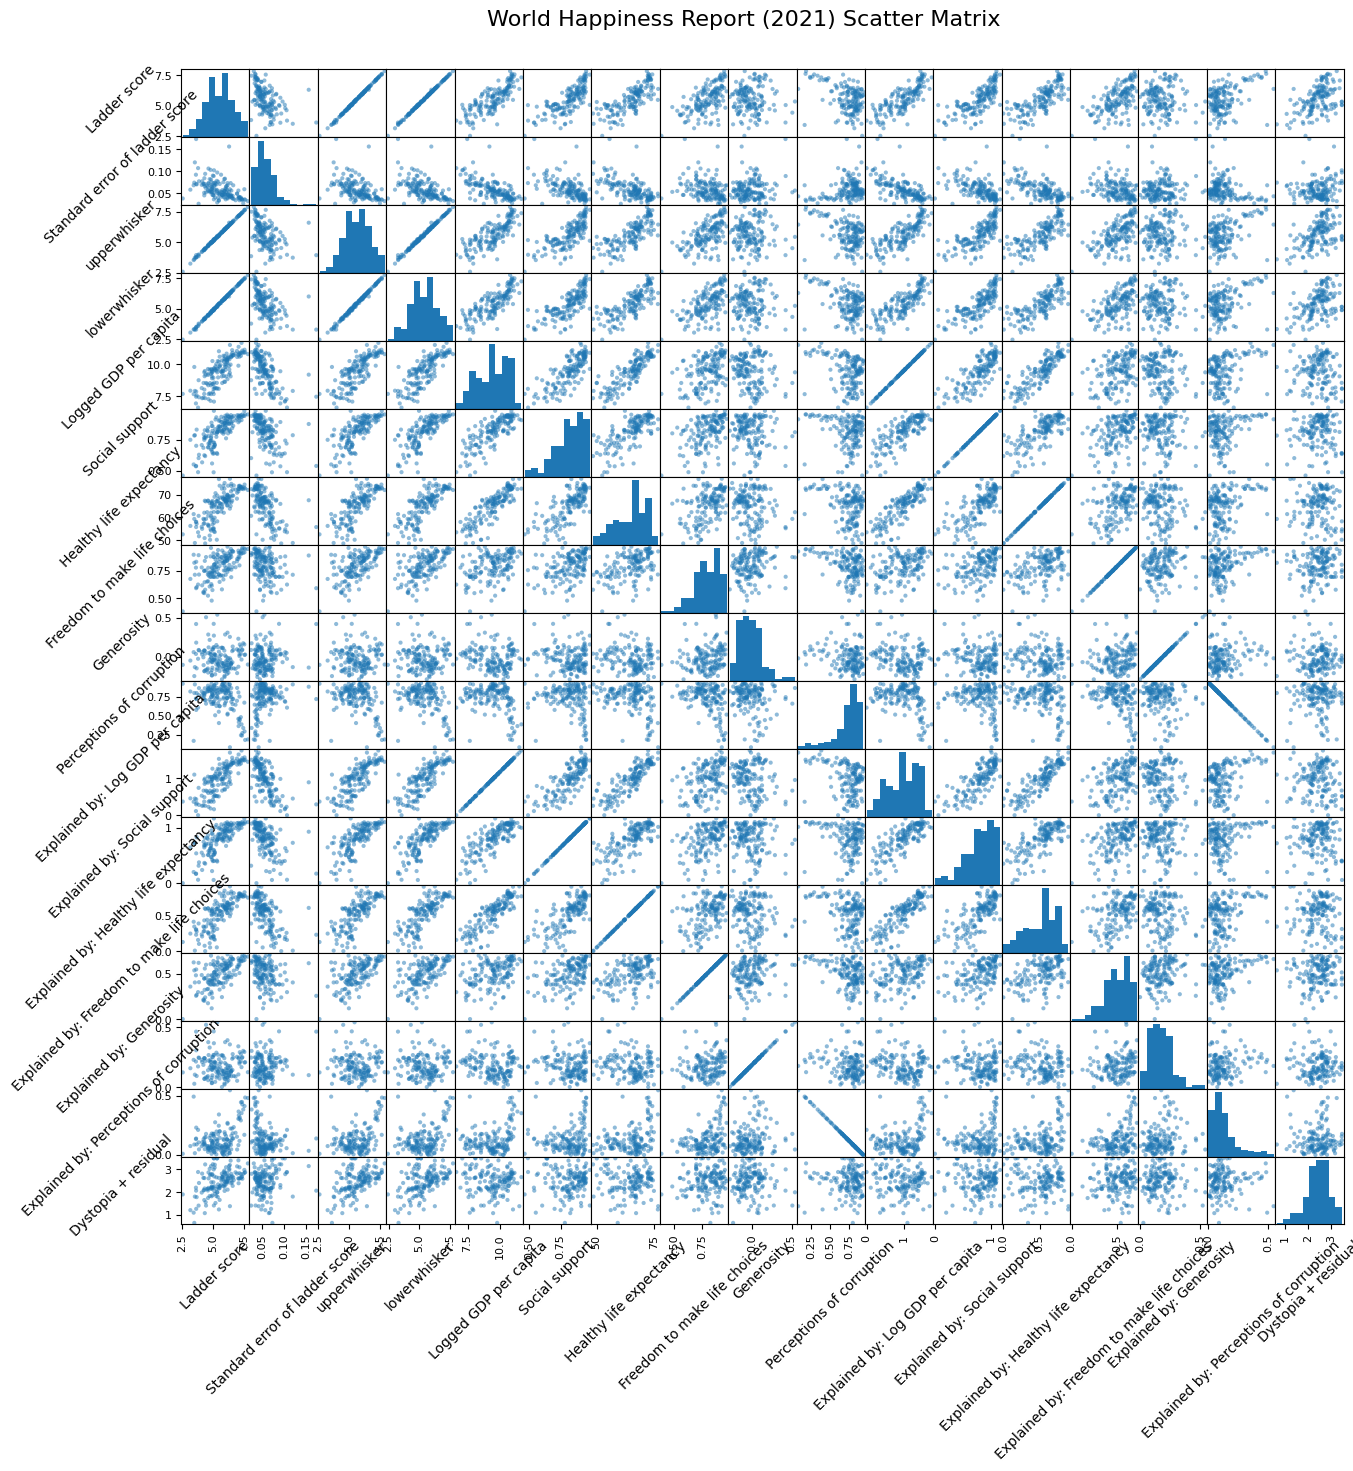

In [226]:
plot_scatter_pairs(happiness, 'World Happiness Report (2021) Scatter Matrix', None)

# Fig 1:
In this figure we are ploting each column data from the world happiness dataset from kaggle in 2021. I was unable to find the dataset from 2024. Here we plot every column against every other column to create our large scatter plot. Each numerical column is plotted against every other column. Each plot is represented by either a scatter plot, or is represented by a histogram in the cases of the data being plotted against itself. We are are abe to see some exact linear relations between some metrics. I am unsure if this is due to some exact scaling law or is due to some kind of data artifacting. However, there seems to be real positive trends in GDP per capita and other metrics seen in the data.

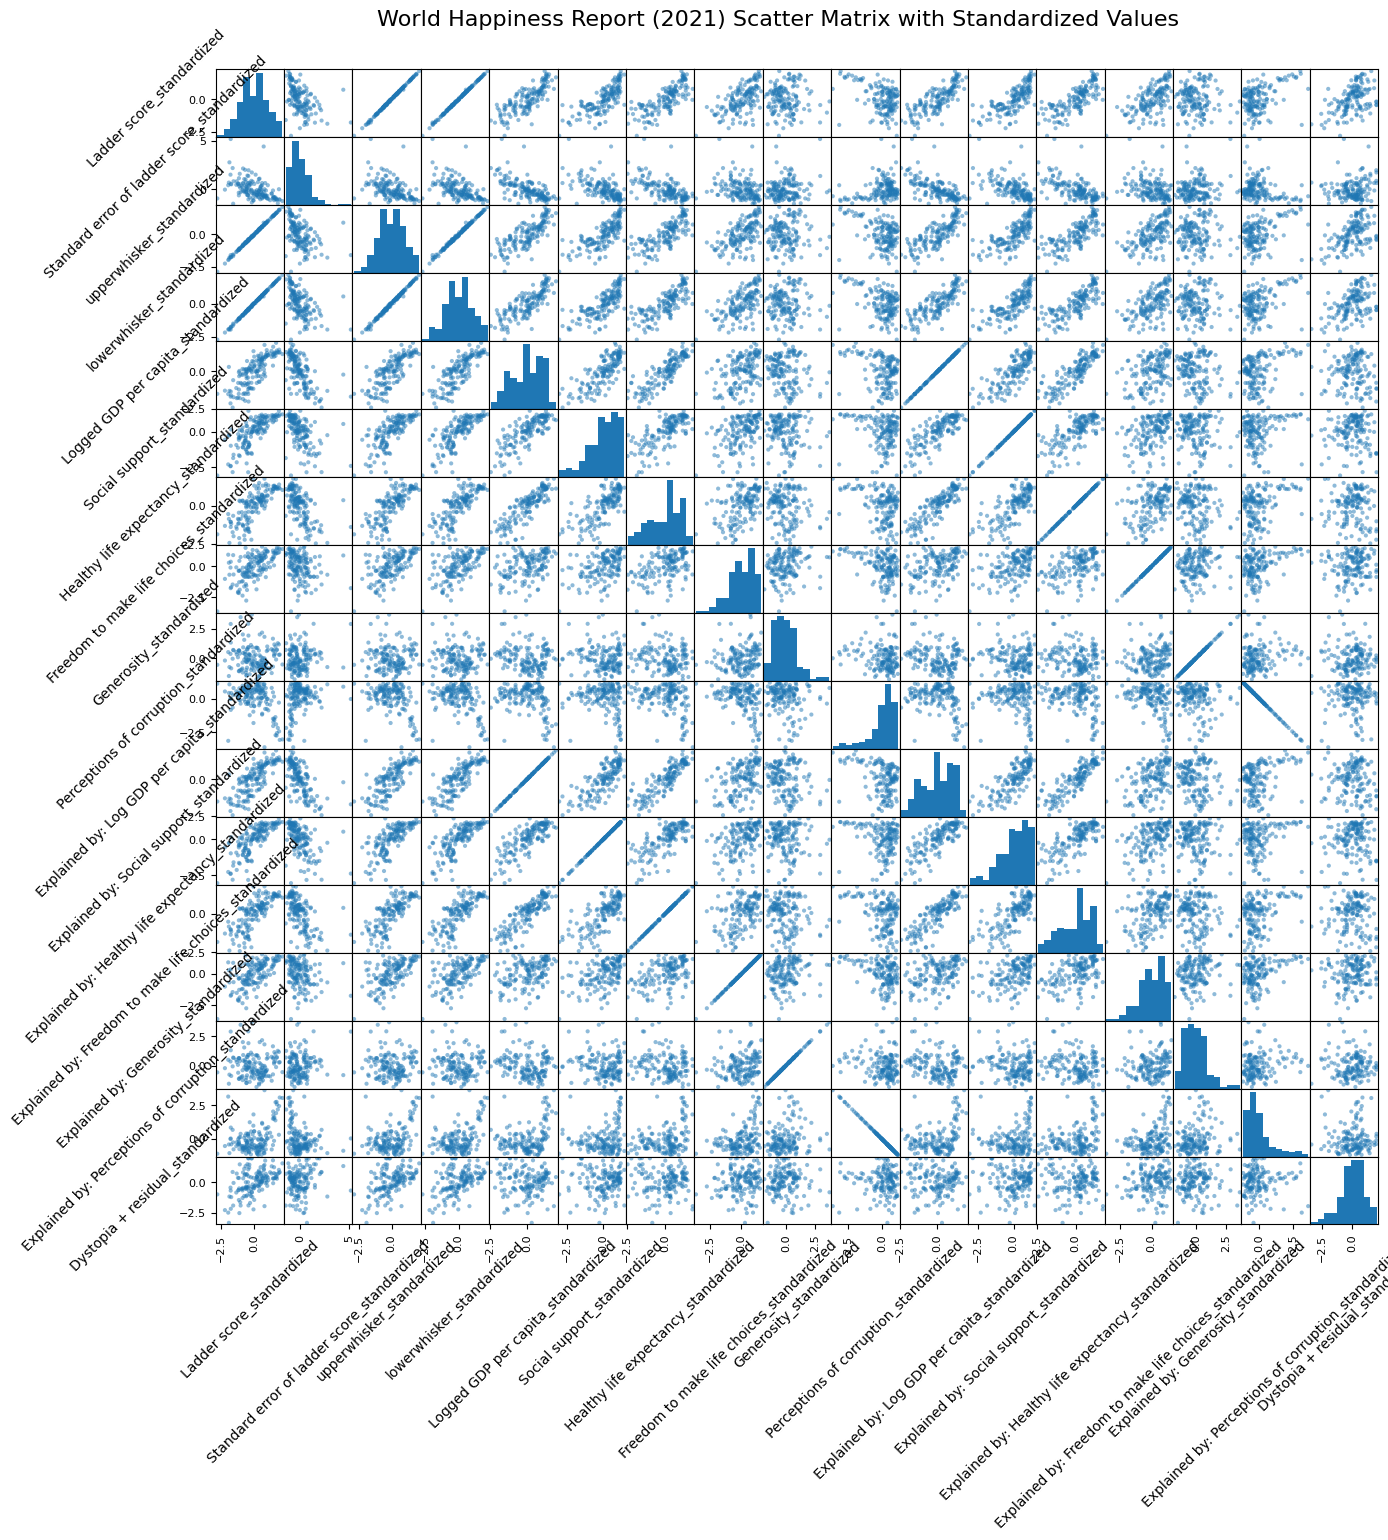

In [227]:
plot_scatter_pairs(scaled_happiness_std, "World Happiness Report (2021) Scatter Matrix with Standardized Values", None)

# Figure 2:

Again, we are ploting each column data from the world happiness dataset from kaggle in 2021. I was unable to find the dataset from 2024. Here we plot every column against every other column to create our large scatter plot. This time we have standardized our data. We are able to see that our data distributions are conserved from the hapiness set, but now range from -2.5 to 2.5.

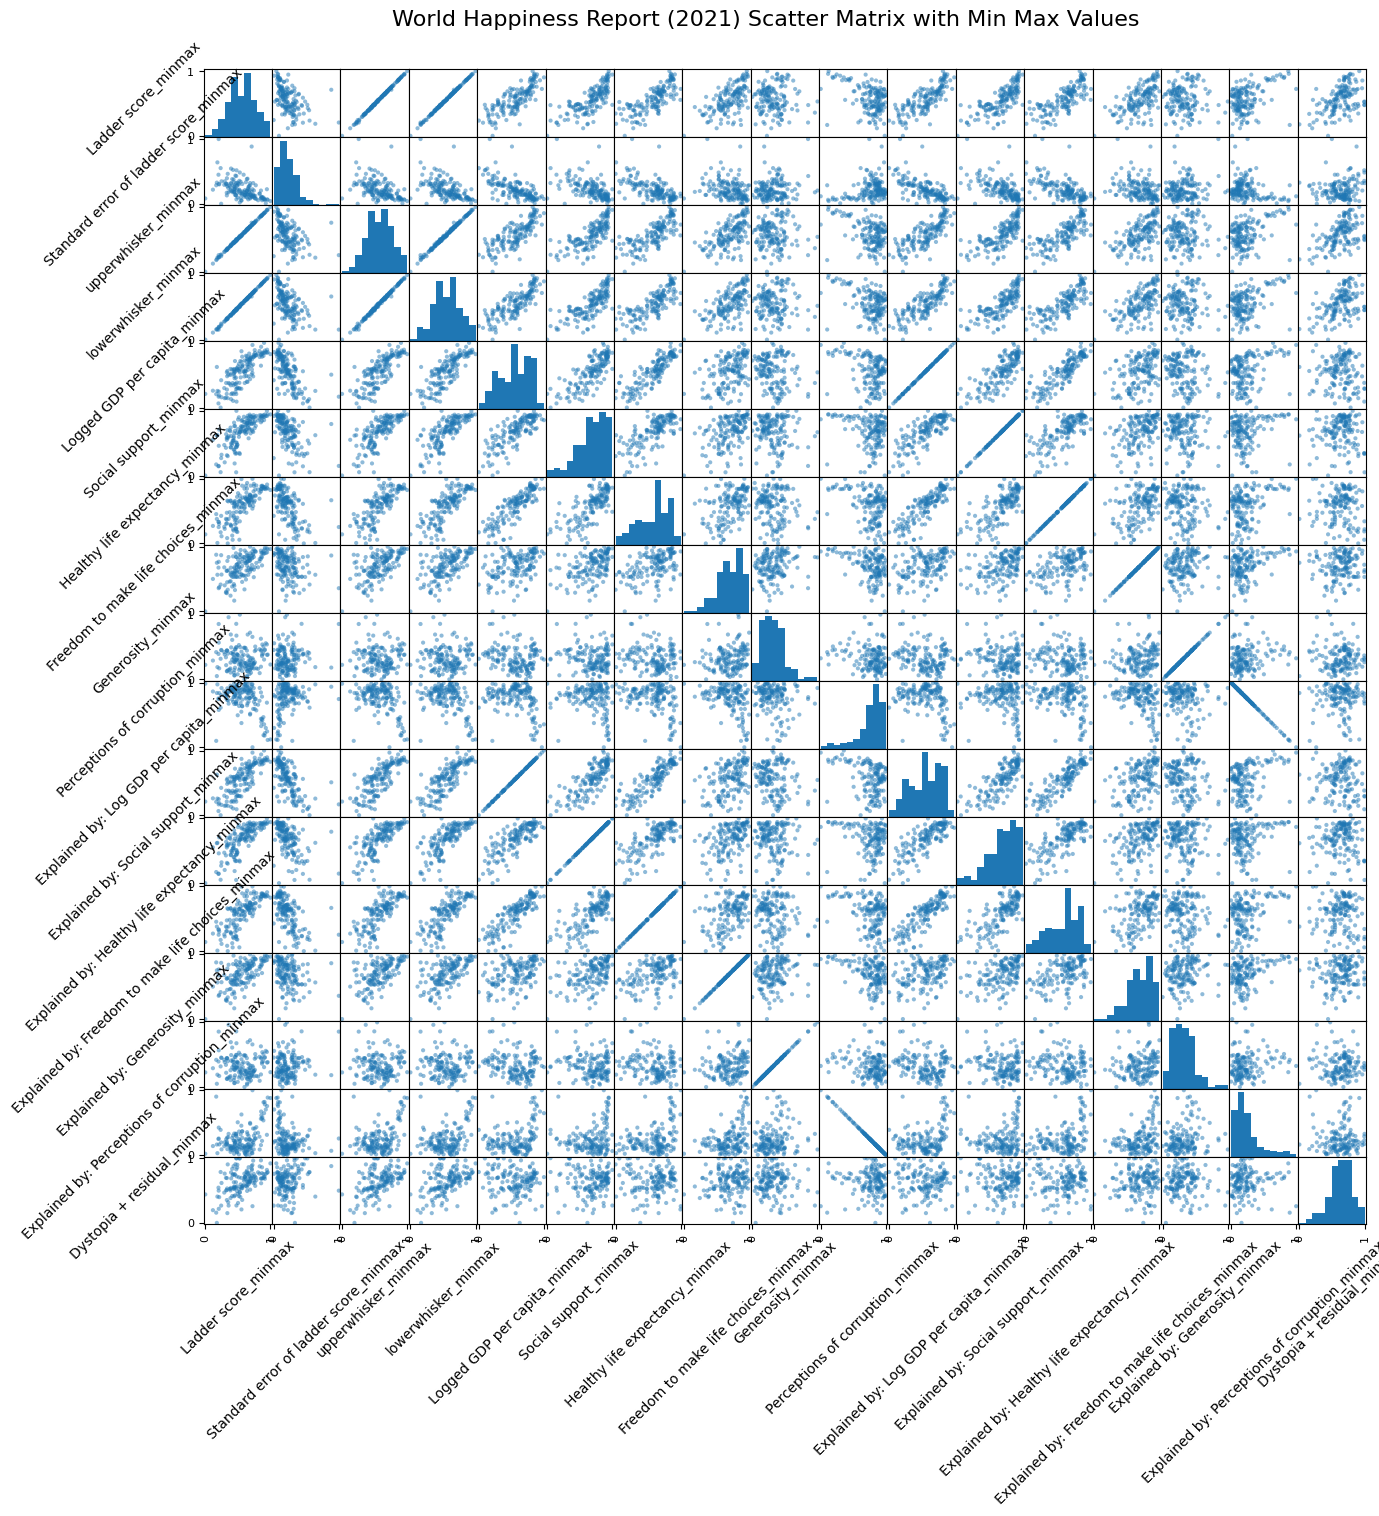

In [228]:

plot_scatter_pairs(scaled_happiness_min_max, "World Happiness Report (2021) Scatter Matrix with Min Max Values", None)

# Figure 3:
Finally, we are ploting each column data from the world happiness dataset from kaggle in 2021. I was unable to find the dataset from 2024. Here we plot every column against every other column to create our large scatter plot. This time we have min maxed our data. The data now ranges from zero to 1 for all of our data, with our distributions kept in tact.

# Clutering
## Task 5:
Task 5: Using KMeans clustering, cluster the scaled numerical features (choose either scaling) that are used to calculate the score: 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual' into 3 clusters

In [229]:
def cluster_happiness_by_columns(original_df, scaled_df, n_clusters, column_indices):
    # Get the names of the columns to use for clustering based on numerical indices
    scaled_columns = scaled_df.columns
    selected_columns = [scaled_columns[i] for i in column_indices if i < len(scaled_columns)]

    # Print the names of the selected scaled columns
    print("Scaled columns used for clustering:", selected_columns)

    # Select the scaled features for clustering
    scaled_features = scaled_df[selected_columns]

    # Initialize and fit KMeans
    kmeans = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    original_df['Cluster'] = kmeans.fit_predict(scaled_features)

    return original_df

In [230]:
original_df = happiness
scaled_df = scaled_happiness_min_max
n_clusters = 3
column_indices = [5, 6, 7, 9, 8, 17]
cluster_happiness_by_columns(original_df, scaled_df, n_clusters, column_indices)

Scaled columns used for clustering: ['Social support_minmax', 'Healthy life expectancy_minmax', 'Freedom to make life choices_minmax', 'Perceptions of corruption_minmax', 'Generosity_minmax']


Country name  Regional indicator  Ladder score  \
0        Finland      Western Europe         7.842   
1        Denmark      Western Europe         7.620   
2    Switzerland      Western Europe         7.571   
3        Iceland      Western Europe         7.554   
4    Netherlands      Western Europe         7.464   
..           ...                 ...           ...   
144      Lesotho  Sub-Saharan Africa         3.512   
145     Botswana  Sub-Saharan Africa         3.467   
146       Rwanda  Sub-Saharan Africa         3.415   
147     Zimbabwe  Sub-Saharan Africa         3.145   
148  Afghanistan          South Asia         2.523   

     Standard error of ladder score  upperwhisker  lowerwhisker  \
0                             0.032         7.904         7.780   
1                             0.035         7.687         7.552   
2                             0.036         7.643         7.500   
3                             0.059         7.670         7.438   
4                             0.027         7.518         7.410   
..                              ...           ...           ...   
144                           0.120         3.748         3.276   
145                           0.074         3.611         3.322   
146                           0.068         3.548         3.282   
147                           0.058         3.259         3.030   
148                           0.038         2.596         2.449   

     Logged GDP per capita  Social support  Healthy life expectancy  \
0                   10.775           0.954                   72.000   
1                   10.933           0.954                   72.700   
2                   11.117           0.942                   74.400   
3                   10.878           0.983                   73.000   
4                   10.932           0.942                   72.400   
..                     ...             ...                      ...   
144                  7.926           0.787                   48.700   
145                  9.782           0.784                   59.269   
146                  7.676           0.552                   61.400   
147                  7.943           0.750                   56.201   
148                  7.695           0.463                   52.493   

     Freedom to make life choices  Generosity  Perceptions of corruption  \
0                           0.949      -0.098                      0.186   
1                           0.946       0.030                      0.179   
2                           0.919       0.025                      0.292   
3                           0.955       0.160                      0.673   
4                           0.913       0.175                      0.338   
..                            ...         ...                        ...   
144                         0.715      -0.131                      0.915   
145                         0.824      -0.246                      0.801   
146                         0.897       0.061                      0.167   
147                         0.677      -0.047                      0.821   
148                         0.382      -0.102                      0.924   

     Explained by: Log GDP per capita  Explained by: Social support  \
0                               1.446                         1.106   
1                               1.502                         1.108   
2                               1.566                         1.079   
3                               1.482                         1.172   
4                               1.501                         1.079   
..                                ...                           ...   
144                             0.451                         0.731   
145                             1.099                         0.724   
146                             0.364                         0.202   
147                             0.457                         0.649   
148

# Task 6:
Task 6: Make a scatter plot with the cluster (0, 1, or 2) on the X axis, and the Happiness score with its errorbar on the Y axis and, as usual, comment on the figure your what, how, wow

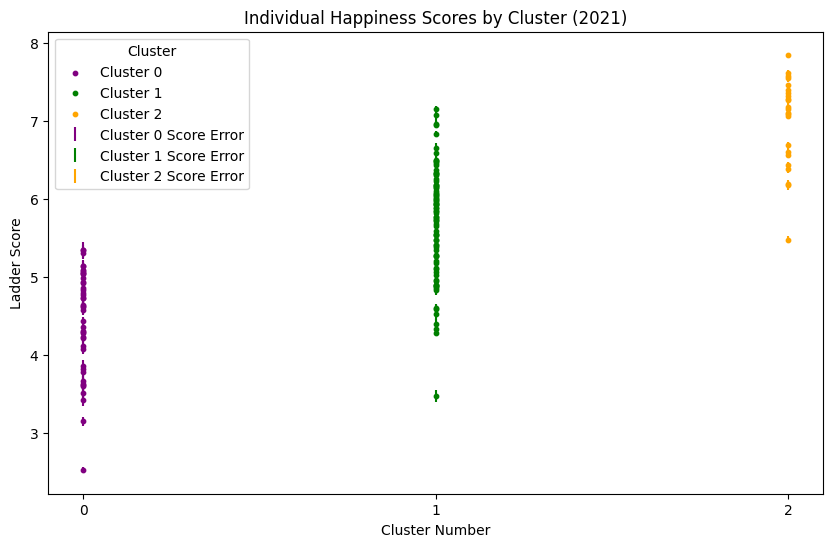

In [231]:

# Create the scatter plot of individual happiness scores by cluster
plt.figure(figsize=(10, 6))

# Define colors for each cluster
colors = {0: 'purple', 1: 'green', 2: 'orange'} # Use a dictionary for mapping cluster to color

# Plot each cluster separately
for cluster_label in sorted(happiness['Cluster'].unique()):
    cluster_data = happiness[happiness['Cluster'] == cluster_label]
    plt.scatter(
        x=cluster_data['Cluster'],
        y=cluster_data['Ladder score'],
        color=colors[cluster_label],
        label=f'Cluster {cluster_label}',
        s=10
    )
    plt.errorbar(
        x=cluster_data['Cluster'],
        y=cluster_data['Ladder score'],
        yerr=cluster_data['Standard error of ladder score'],
        fmt='none',
        color=colors[cluster_label],
        label=f'Cluster {cluster_label} Score Error'
    )

# Set labels and title
plt.xlabel('Cluster Number')
plt.ylabel('Ladder Score')
plt.title('Individual Happiness Scores by Cluster (2021)')
plt.xticks(sorted(happiness['Cluster'].unique())) # Only show values 0,1,2 on the X axis
plt.legend(title='Cluster')

plt.show()

# Figure 4:
Here, we are plotting our hapiness data that we used KMeans clustering, cluster the scaled numerical features (choose either scaling) that are used to calculate the score: 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual' into 3 clusters, then plotted our three clusters agaisnt our happiness ladder score. Coorisponding error is also included in the plot. The legend outlines as such, with colors coorisponding to each cluster. We are able to see that cluster zero is the elaest happy on average, cluster 1 is happier, and cluster 2 is the most happy on average. Cluster 1 includes the largest range of values, when compared to cluster 0 and 1. There is quite a bit of sharex calues between clusters 1 and the other clusters.